In [2]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [3]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=18, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

We load the Fashion MNIST T dataset using Keras’ dataset modulee, adhering to the default training and
test split specified in the official documentation, https://keras.io/api/datasets/fashion_mnist/. Then, use
the last 10,000 instances of the training subset as the validation subset.
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


We will record the class distribution of the 3 distinct subsets (training/validation/test) in a Pandas Dataframe,
sorting them by the column name, in a way to coincide with the actual name of the existing labels.
We list the class names according to the documentation

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train[0]


9

In [10]:

class_names[y_train[0]]


'Ankle boot'

Do some research on the sets created

In [11]:

y_train_df = pd.DataFrame(y_train,columns=['class_name'])
y_train_labels_count = y_train_df['class_name'].value_counts().sort_index()
y_train_labels_count


class_name
0    4977
1    5012
2    4992
3    4979
4    4950
5    5004
6    5030
7    5045
8    5032
9    4979
Name: count, dtype: int64

To compute the class counts we call the np.bincount which count number of occurrences of each value in array of non-negative ints and we wrap this in a dictionary to use it for the Data Frame creation.


In [12]:
data_counts = {
    "y_train": np.bincount(y_train, minlength=10),
    "y_valid": np.bincount(y_valid, minlength=10),
    "y_test": np.bincount(y_test, minlength=10),
}


In [13]:
Class_distribution_between_sets = pd.DataFrame.from_dict(data_counts, orient='index', columns=class_names)

We print the dataframe.

In [14]:
print('Class distribution between sets')
Class_distribution_between_sets

Class distribution between sets


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
y_train,4977,5012,4992,4979,4950,5004,5030,5045,5032,4979
y_valid,1023,988,1008,1021,1050,996,970,955,968,1021
y_test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


We record the min and max values of each part of the dataset(X_train, X_valid, X_test) using a dictionary to store the values.

In [15]:
ranges = {
    "X_train": (np.min(X_train), np.max(X_train)),
    "X_valid": (np.min(X_valid), np.max(X_valid)),
    "X_test": (np.min(X_test), np.max(X_test)),
}

We print the results for each dataset

In [16]:
for dataset, (min_val, max_val) in ranges.items():
    print(f"{dataset}: Min = {min_val}, Max = {max_val}")

X_train: Min = 0, Max = 255
X_valid: Min = 0, Max = 255
X_test: Min = 0, Max = 255


And we scale the data to normalize the pixel values be dividing with 255.0 since the max value is the same for every dataset (this also converts them to floats).

In [17]:
X_train_scaled = X_train / 255.0
X_valid_scaled = X_valid/ 255.0
X_test_scaled = X_test / 255.0

We expect the range to be from 0 to 1.

In [18]:
print(f"X_train: Min = {X_train_scaled.min()}, Max = {X_train_scaled.max()}")
print(f"X_valid: Min = {X_valid_scaled.min()}, Max = {X_valid_scaled.max()}")
print(f"X_test: Min = {X_test_scaled.min()}, Max = {X_test_scaled.max()}")


X_train: Min = 0.0, Max = 1.0
X_valid: Min = 0.0, Max = 1.0
X_test: Min = 0.0, Max = 1.0



We will create two data variants, the first will retain only the top half (upper portion) of each image and the second will retain the bottom half (lower portion) of each image.

In [19]:

#X_train_scaled.shape
X_train_scaled_top = X_train_scaled[:,:14,:]
X_train_scaled_bottom = X_train_scaled[:,-14:, :]
X_test_scaled_top = X_test_scaled[:,:14,:]
X_test_scaled_bottom = X_test_scaled[:,-14:, :]
X_valid_scaled_top = X_valid_scaled[:,:14,:]
X_valid_scaled_bottom = X_valid_scaled[:,-14:, :]
print(X_train_scaled_top.shape, X_train_scaled_bottom.shape)
print(X_test_scaled_top.shape, X_test_scaled_bottom.shape)
print(X_valid_scaled_top.shape, X_valid_scaled_bottom.shape)


(50000, 14, 28) (50000, 14, 28)
(10000, 14, 28) (10000, 14, 28)
(10000, 14, 28) (10000, 14, 28)



We plot the first 20 top and bottom cropped images from the training set, along with the corresponding full image to verify the result.

The first 20 top-cropped images of the training set:


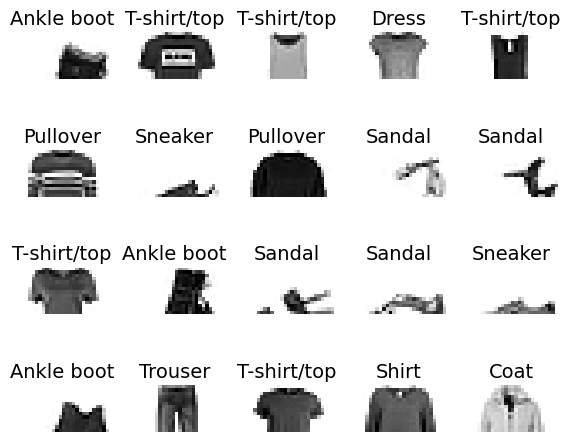

And the first 20 bottom-cropped images of the training set:


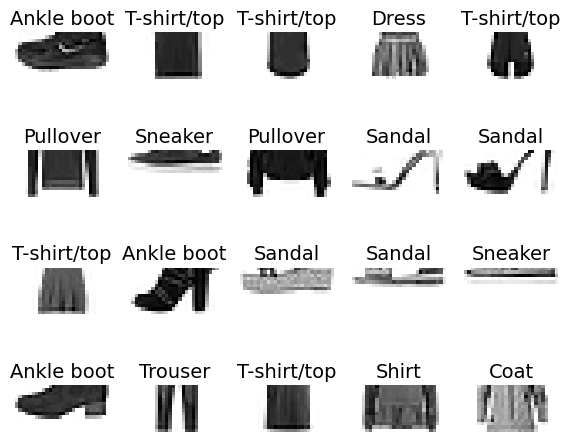

The original first 20 images of the training set(for process verification) :


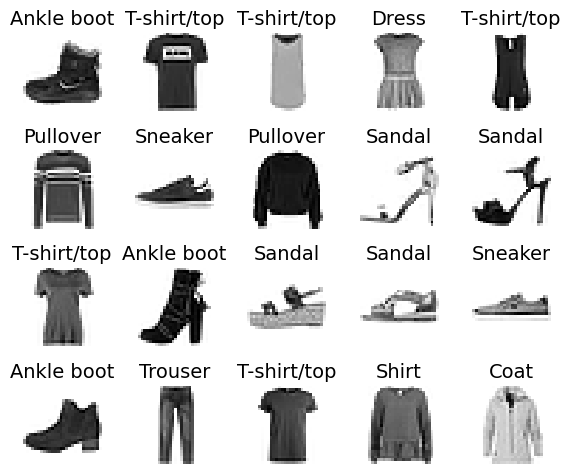

In [20]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_scaled_top[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
print('The first 20 top-cropped images of the training set:')
plt.show()

n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_scaled_bottom[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
print('And the first 20 bottom-cropped images of the training set:')
plt.show()

n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.4))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_scaled[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
print('The original first 20 images of the training set(for process verification) :')
plt.show()


We will build a neural network using Tensorflow/Keras for a multiclass classification task. The network will have two hidden dense layers with 128 and 64 nodes, and use ReLU as the activation function of each layer. For the output layer, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function because the classes are exclusive.


In [21]:
#X_train_scaled_bottom.shape
tf.random.set_seed(42)
model = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])


c:\Users\tasos\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We compile the model using the SGD optimizer with a learning rate of 10−4, sparse categorical cross-entropy as the loss function, and we add classification accuracy to the metrics.

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate =  10**(-4))
loss_function = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer = optimizer, loss = loss_function, metrics = metrics)


We print the summary of the model.

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

We train one model for the top-cropped data and one for the bottom-cropped data. First we save the initial weights of the model to ensure that the weight will initialized before training the second model.

In [24]:
initial_weights = model.get_weights()

We initialize the model weights here for the shake of the reproduction of the code during tests.

In [25]:
model.set_weights(initial_weights) 

We train the model on the top cropped training data and use also the validation set for further observation.

In [26]:
model_top = model.fit(X_train_scaled_top,y_train, epochs=10,batch_size=32,
                      validation_data = (X_valid_scaled_top,y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1242 - loss: 2.2638 - val_accuracy: 0.1325 - val_loss: 2.1727
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1544 - loss: 2.1477 - val_accuracy: 0.2240 - val_loss: 2.0702
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2554 - loss: 2.0522 - val_accuracy: 0.3498 - val_loss: 1.9818
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3746 - loss: 1.9668 - val_accuracy: 0.4453 - val_loss: 1.8974
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4557 - loss: 1.8836 - val_accuracy: 0.5015 - val_loss: 1.8138
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5090 - loss: 1.8008 - val_accuracy: 0.5355 - val_loss: 1.7320
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5386 - loss: 1.7198 - val_accuracy: 0.5577 - val_loss: 1.6536
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5579 - loss: 1.6

We evaluate the model.

In [27]:
model.evaluate(X_test_scaled_top, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5800 - loss: 1.4641


[1.4652506113052368, 0.5792999863624573]

And we predict the labels for the top cropped test data.

In [28]:

y_pred_top_proba = model.predict(X_test_scaled_top)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


We dislpay the results. For each instance we get an array with every class probability.

In [29]:
y_pred_top_proba.round(2)

array([[0.04, 0.06, 0.06, ..., 0.2 , 0.12, 0.2 ],
       [0.21, 0.01, 0.28, ..., 0.  , 0.05, 0.01],
       [0.02, 0.66, 0.04, ..., 0.01, 0.02, 0.01],
       ...,
       [0.1 , 0.11, 0.12, ..., 0.08, 0.11, 0.06],
       [0.03, 0.42, 0.05, ..., 0.02, 0.03, 0.03],
       [0.05, 0.08, 0.07, ..., 0.19, 0.11, 0.16]], dtype=float32)

We assign the maximum value(probability) of each instance's array to y_pred_top. 

In [30]:
y_pred_top = y_pred_top_proba.argmax(axis=-1)
y_pred_top

array([7, 2, 1, ..., 2, 1, 7], dtype=int64)

And we display the class name corresponding to the label number.

In [31]:
np.array(class_names)[y_pred_top]

array(['Sneaker', 'Pullover', 'Trouser', ..., 'Pullover', 'Trouser',
       'Sneaker'], dtype='<U11')

We do the same for the test set.

In [32]:

np.array(class_names)[y_test]


array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

And we calculate the classification report of this model.

In [33]:

cl_report_top = classification_report(y_test,y_pred_top)


In [34]:
#conf_matrix_dtree = print(confusion_matrix(y_test,y_pred_top))


We initialize the weights of the model.

In [35]:

model.set_weights(initial_weights)


And we train the second model.

In [36]:
model_bottom = model.fit(X_train_scaled_bottom, y_train, epochs=10, batch_size=32,
                         validation_data = (X_valid_scaled_bottom,y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1493 - loss: 2.2481 - val_accuracy: 0.2091 - val_loss: 2.1466
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2320 - loss: 2.1186 - val_accuracy: 0.3101 - val_loss: 2.0420
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3378 - loss: 2.0193 - val_accuracy: 0.4063 - val_loss: 1.9482
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4187 - loss: 1.9280 - val_accuracy: 0.4489 - val_loss: 1.8582
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4558 - loss: 1.8397 - val_accuracy: 0.4777 - val_loss: 1.7710
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4864 - loss: 1.7544 - val_accuracy: 0.5097 - val_loss: 1.6883
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5153 - loss: 1.6740 - val_accuracy: 0.5344 - val_loss: 1.6122
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5410 - loss: 1.6000 

We evaluate it on the test set.

In [37]:
model.evaluate(X_test_scaled_bottom, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5692 - loss: 1.4333


[1.4351609945297241, 0.5684000253677368]

We predict the labels for the bottom cropped test data.

In [38]:
y_pred_bottom_proba = model.predict(X_test_scaled_bottom)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


We dislpay the results. For each instance we get an array with every class probability.

In [39]:
y_pred_bottom_proba.round(2)


array([[0.01, 0.03, 0.04, ..., 0.12, 0.16, 0.48],
       [0.01, 0.  , 0.33, ..., 0.02, 0.09, 0.05],
       [0.02, 0.76, 0.02, ..., 0.01, 0.03, 0.  ],
       ...,
       [0.42, 0.05, 0.04, ..., 0.01, 0.04, 0.01],
       [0.08, 0.4 , 0.06, ..., 0.04, 0.07, 0.02],
       [0.04, 0.05, 0.09, ..., 0.18, 0.11, 0.21]], dtype=float32)

We assign the maximum value(probability) of each instance's array to y_pred_bottom.

In [40]:
y_pred_bottom = y_pred_bottom_proba.argmax(axis=-1)
y_pred_bottom


array([9, 4, 1, ..., 0, 1, 9], dtype=int64)

And we display the class name corresponding to the label number.

In [41]:
np.array(class_names)[y_pred_bottom]


array(['Ankle boot', 'Coat', 'Trouser', ..., 'T-shirt/top', 'Trouser',
       'Ankle boot'], dtype='<U11')

We do the same for the test set.

In [42]:
np.array(class_names)[y_test]


array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

And we calculate the classification report of this model.

In [43]:
cl_report_bottom = classification_report(y_test,y_pred_bottom)


In [44]:
#conf_matrix_dtree = print(confusion_matrix(y_test,y_pred_bottom))


We print both classification reports to compare the results.

In [45]:

print(f'The classification report of the top cropped model is:\n { cl_report_top}')
print(f'The classification report of the bottom cropped model is:\n { cl_report_bottom}')


The classification report of the top cropped model is:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66      1000
           1       0.63      0.91      0.74      1000
           2       0.41      0.62      0.49      1000
           3       0.76      0.35      0.48      1000
           4       0.40      0.61      0.48      1000
           5       0.85      0.03      0.05      1000
           6       0.39      0.12      0.19      1000
           7       0.71      0.76      0.74      1000
           8       0.80      0.80      0.80      1000
           9       0.55      0.98      0.70      1000

    accuracy                           0.58     10000
   macro avg       0.62      0.58      0.53     10000
weighted avg       0.62      0.58      0.53     10000

The classification report of the bottom cropped model is:
               precision    recall  f1-score   support

           0       0.51      0.71      0.60      1000
           1     

We observe that  the bottom cropped model performs better on classes 1, 3, and 7, while the top cropped model do better on classes 2, 4, 8, and 9. Both models perform bad on classes 5 and 6.

We will display the first five images of the test set while the top cropped model predicted correctly and the bottom cropped model predicted wrong. 
We create the boolean mask of the indices we want.

In [46]:
top_correct_bottom_wrong_instances= (y_test == y_pred_top) & (y_test !=y_pred_bottom)


We define the actual labels, the bottom cropped model wrong predictions and the test data for the indices we want. 

In [47]:

tc_bw_actual_labels = y_test[top_correct_bottom_wrong_instances];tc_bw_actual_labels[:5]
bottom_wrong_predictions = y_pred_bottom[top_correct_bottom_wrong_instances]
tc_bw_X_data = X_test[top_correct_bottom_wrong_instances]


In [48]:
#y_pred_top[top_correct_bottom_wrong_instances][:5]
# tc_bw_bottom_predictions = y_pred_bottom[top_correct_bottom_wrong_instances]
# tc_bw_bottom_predictions[:5]
#y_pred_bottom[bottom_correct_top_wrong_instances][:5]


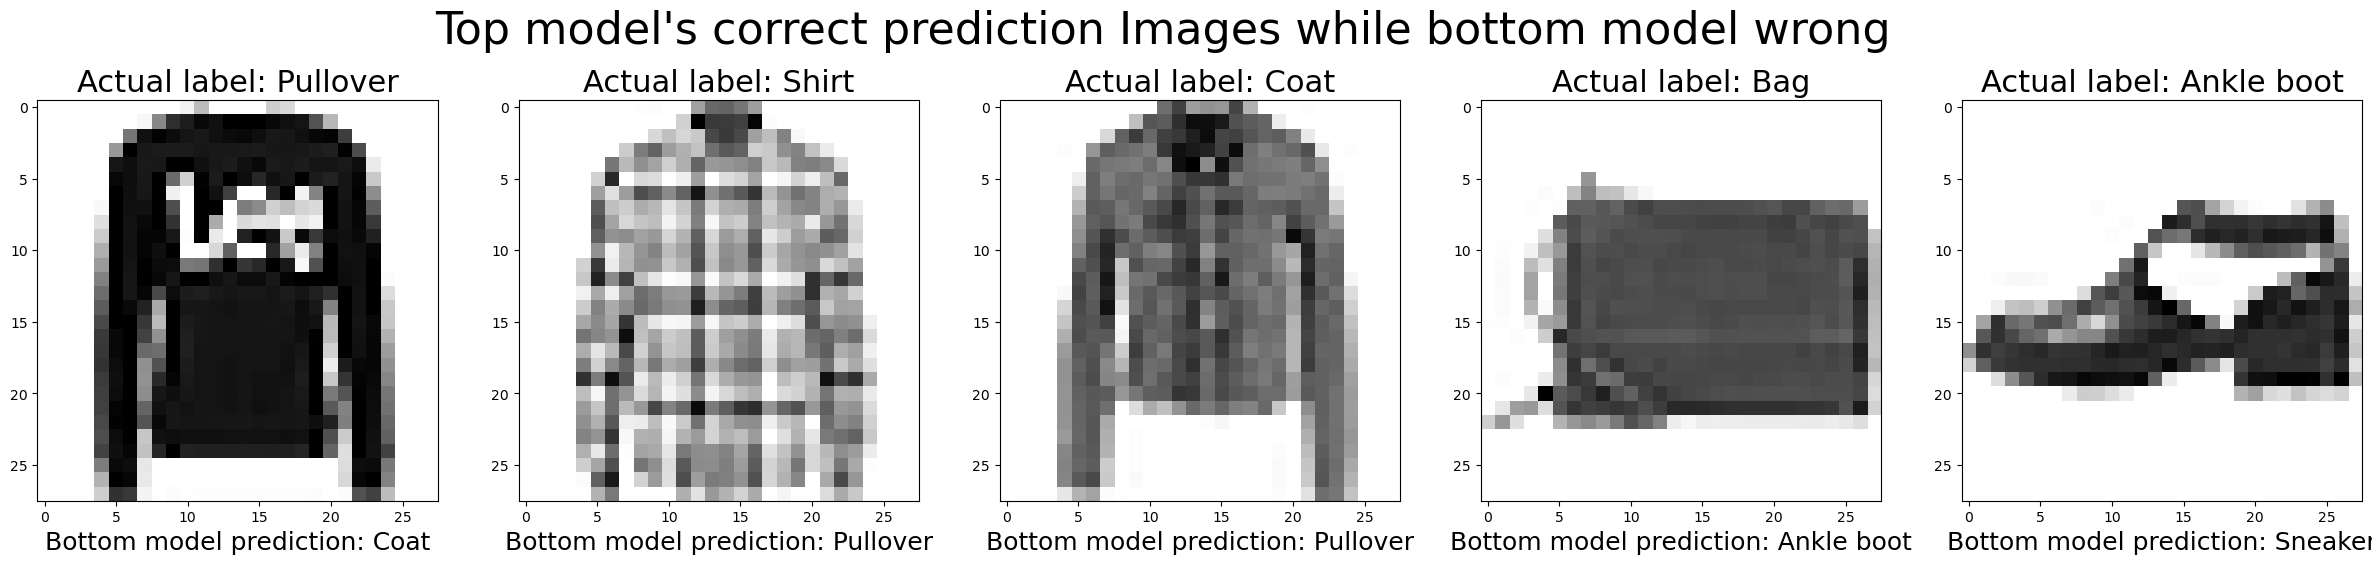

In [49]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
fig.suptitle("Top model's correct prediction Images while bottom model wrong", fontsize=32)
#plt.tight_layout(rect=[0, 0, 1, 0.95])

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(tc_bw_X_data[i], cmap='binary')
    plt.title(f"Actual label: {class_names[tc_bw_actual_labels[i]]}", fontsize=22)
    plt.xlabel(f'Bottom model prediction: {class_names[bottom_wrong_predictions[i]]}' )
plt.show() 


We do the same for bottom correct - top wrong predictions

In [75]:
bottom_correct_top_wrong_instances= (y_test == y_pred_bottom) & (y_test !=y_pred_top)
bc_tw_actual_labels = y_test[bottom_correct_top_wrong_instances]
top_wrong_predictions = y_pred_top[bottom_correct_top_wrong_instances]
bc_tw_X_data = X_test[bottom_correct_top_wrong_instances]


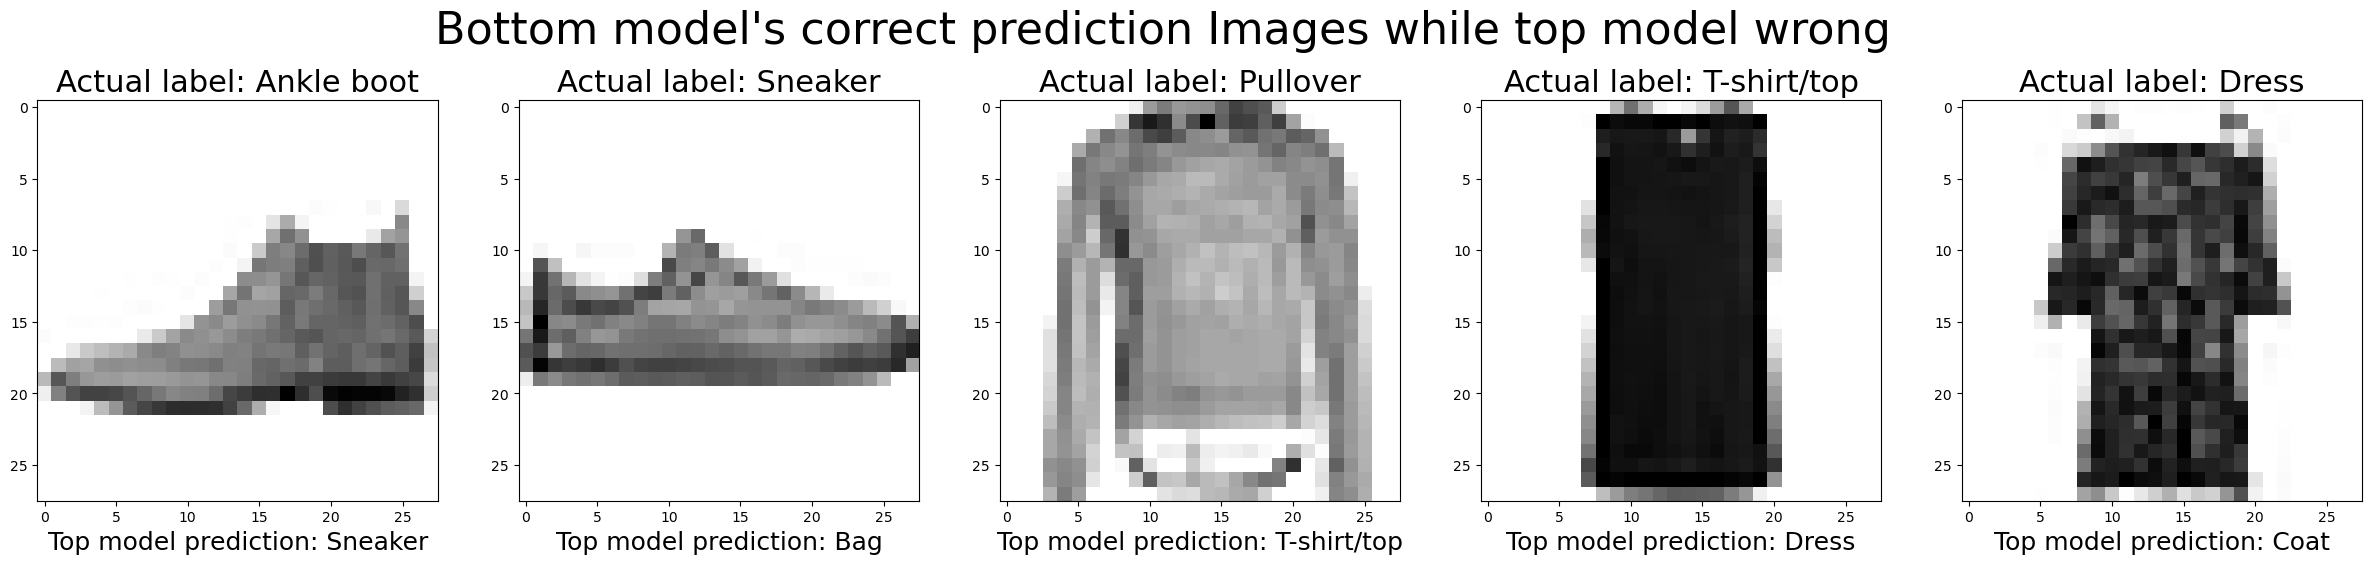

In [76]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))

fig.suptitle("Bottom model's correct prediction Images while top model wrong", fontsize=32)
#plt.tight_layout(rect=[0, 0, 1, 0.95])

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(bc_tw_X_data[i], cmap='binary')
    plt.title(f"Actual label: {class_names[bc_tw_actual_labels[i]]}", fontsize=22)
    plt.xlabel(f'Top model prediction: {class_names[top_wrong_predictions[i]]}' )
plt.show() 


We will create 4 models and explore strategies that help neural network architectures mitigate overfitting issues.


Import the appropriate libraries to start with.

In [52]:

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [53]:

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]
X_train_scaled = X_train / 255.0
X_valid_scaled = X_valid/ 255.0
X_test_scaled = X_test / 255.0
print(f"X_train: Min = {X_train_scaled.min()}, Max = {X_train_scaled.max()}")
print(f"X_valid: Min = {X_valid_scaled.min()}, Max = {X_valid_scaled.max()}")
print(f"X_test: Min = {X_test_scaled.min()}, Max = {X_test_scaled.max()}")


X_train: Min = 0.0, Max = 1.0
X_valid: Min = 0.0, Max = 1.0
X_test: Min = 0.0, Max = 1.0


We will be using the data variant we created before and had the top-cropped image data stored in them.

In [54]:
X_train_scaled_top = X_train_scaled[:,:14,:]
X_test_scaled_top = X_test_scaled[:,:14,:]
X_valid_scaled_top = X_valid_scaled[:,:14,:]
print(X_train_scaled_top.shape)
print(X_test_scaled_top.shape)
print(X_valid_scaled_top.shape)


(50000, 14, 28)
(10000, 14, 28)
(10000, 14, 28)


We will use an Adam optimizer and train the model for 15 epochs with batch size of 32, along with sparse categorical crossentropy as the loss function and accuracy ass added  metric.

In [55]:
tf.random.set_seed(42)


In [56]:
model = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])


c:\Users\tasos\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
#optimizer = tf.keras.optimizers.Adam()
loss_function = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
epochs = 15
batch_size = 32


We create and train a base model(model1) using Tensorflow/Keras library with three hidden layers of 128, 64,
and 32 nodes, respectively, and add ReLU as their activation function.

In [58]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])


We display its summary.

In [59]:

model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

We compile the model.

In [60]:

model1.compile(optimizer = tf.keras.optimizers.Adam(), loss = loss_function, metrics = metrics)


We save the initial weights for the sake of code reproduction.

In [61]:

initial_weights_model1 = model1.get_weights()


We train the model(validation data added even they are not asked on this particular question).

In [62]:
model1.set_weights(initial_weights_model1) #We initialize the model weights.
model_1 = model1.fit(X_train_scaled_top,y_train, epochs=epochs,batch_size=batch_size,
                      validation_data = (X_valid_scaled_top,y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7045 - loss: 0.8342 - val_accuracy: 0.8112 - val_loss: 0.5122
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8118 - loss: 0.5019 - val_accuracy: 0.8261 - val_loss: 0.4737
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8280 - loss: 0.4575 - val_accuracy: 0.8264 - val_loss: 0.4658
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8353 - loss: 0.4337 - val_accuracy: 0.8304 - val_loss: 0.4541
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8425 - loss: 0.4116 - val_accuracy: 0.8325 - val_loss: 0.4552
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8490 - loss: 0.3973 - val_accuracy: 0.8363 - val_loss: 0.4458
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8540 - loss: 0.3836 - val_accuracy: 0.8373 - val_loss: 0.4499
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8597 - loss: 0.371

We evaluate the model on the test data(as a standard procedure before setting ready to deploy).

In [63]:
model1.evaluate(X_test_scaled_top, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8279 - loss: 0.5462


[0.534256637096405, 0.8327999711036682]

In [64]:
#We predict labels using the test data. 
y_pred_model1_proba = model1.predict(X_test_scaled_top)
y_pred_model1_proba.round(2)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[0. , 0. , 0. , ..., 0.6, 0. , 0.4],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]], dtype=float32)

In [65]:
#We assign the maximum value(probability) of each instance's array to the predictions.
y_pred_model1 = y_pred_model1_proba.argmax(axis=-1)
y_pred_model1


array([7, 2, 1, ..., 8, 1, 5], dtype=int64)

In [66]:
#We create a classification report.
cl_report_model1 = classification_report(y_test,y_pred_model1)
print(cl_report_model1)


              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1000
           1       0.93      0.96      0.95      1000
           2       0.72      0.75      0.74      1000
           3       0.84      0.87      0.86      1000
           4       0.71      0.68      0.69      1000
           5       0.97      0.92      0.95      1000
           6       0.66      0.51      0.58      1000
           7       0.87      0.95      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.90      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



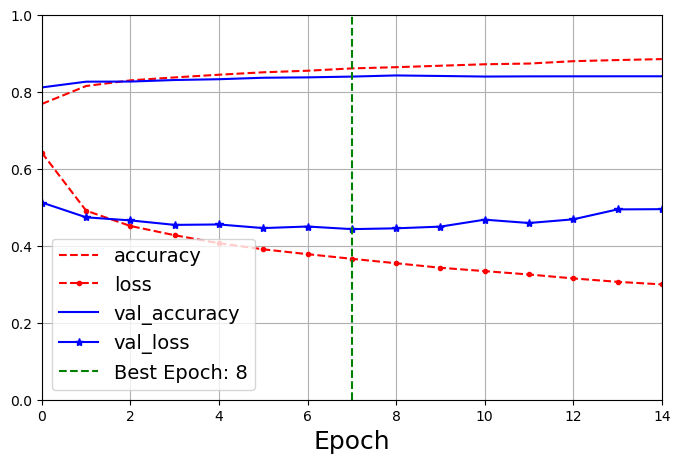

In [67]:
#We wrap the history object in a DataFrame to plot the learning curves of  the mean training loss and accuracy measured over each
#epoch, and the mean validation loss and accuracy measured at the end of each epoch.
model_1_df = pd.DataFrame(model_1.history)

pd.DataFrame(model_1.history).plot(
 figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

best_epoch = model_1_df['val_loss'].idxmin() +1
plt.axvline(x=(best_epoch-1), color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')
plt.legend()
plt.show()


We observe some overfitting as both validation accuracy and validation loss are not matching the results of the the training values even at the best epoch. Classes 4 and 6 are difficult to predict.


In [68]:

#We rebuilt and train the base model after adding an early stopping mechanism, with a patience argument of 3, and track the validation loss.
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])
model2.summary()
model2.compile(optimizer = tf.keras.optimizers.Adam(), loss = loss_function, metrics = metrics)
initial_weights_model2 = model2.get_weights()
early_stopping_model_2 = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
model2.set_weights(initial_weights_model2) #We initialize the model weights.
model_2 = model2.fit(X_train_scaled_top,y_train, epochs=epochs,batch_size=batch_size,
                      validation_data = (X_valid_scaled_top,y_valid), callbacks=[early_stopping_model_2])


c:\Users\tasos\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7062 - loss: 0.8293 - val_accuracy: 0.8109 - val_loss: 0.5128
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8126 - loss: 0.5060 - val_accuracy: 0.8213 - val_loss: 0.4806
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8256 - loss: 0.4627 - val_accuracy: 0.8260 - val_loss: 0.4657
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8345 - loss: 0.4353 - val_accuracy: 0.8308 - val_loss: 0.4559
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8415 - loss: 0.4152 - val_accuracy: 0.8329 - val_loss: 0.4561
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8478 - loss: 0.3990 - val_accuracy: 0.8334 - val_loss: 0.4555
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8534 - loss: 0.3837 - val_accuracy: 0.8370 - val_loss: 0.4515
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8584 - loss: 0.37

In [69]:
model2.evaluate(X_test_scaled_top, y_test)
y_pred_model2_proba = model2.predict(X_test_scaled_top)
y_pred_model2_proba.round(2)
y_pred_model2 = y_pred_model2_proba.argmax(axis=-1)
y_pred_model2
cl_report_model2 = classification_report(y_test,y_pred_model2)
print(cl_report_model2)
model_2_df = pd.DataFrame(model_2.history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8240 - loss: 0.4945
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.93      0.96      0.94      1000
           2       0.72      0.73      0.72      1000
           3       0.86      0.83      0.85      1000
           4       0.72      0.68      0.70      1000
           5       0.97      0.90      0.93      1000
           6       0.60      0.58      0.59      1000
           7       0.84      0.96      0.89      1000
           8       0.95      0.95      0.95      1000
           9       0.94      0.87      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



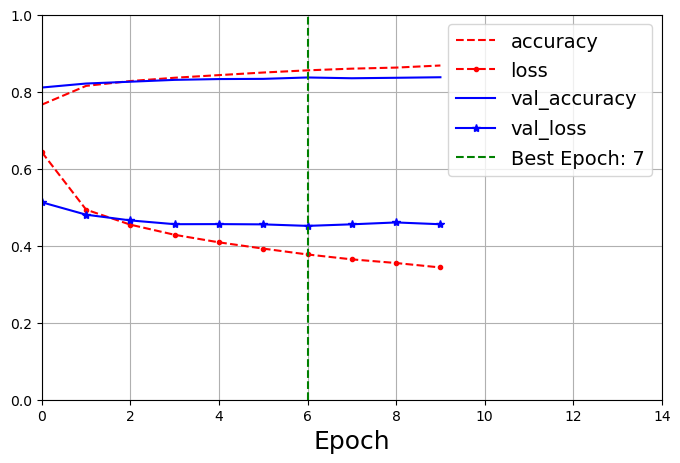

In [70]:

pd.DataFrame(model_2.history).plot(
 figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

best_epoch = model_2_df['val_loss'].idxmin() +1
plt.axvline(x=(best_epoch-1), color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')
plt.legend()
plt.show()


Early stopping worked stopping the training after validation loss didn't improve for 3 epochs. Even with that, still model observation indicates overfitting. Classes 2,4 and 6 are difficult to recognized by the model showing poor performance.

We rebuilt and train the base model and this time we will incorporating a batch normalization layer after each dense
layer. We won't be using warly stopping here and the use bias argument of dense layers will be set to False.

In [71]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu", use_bias=False),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(64, activation="relu", use_bias=False),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(32, activation="relu", use_bias=False),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.Dense(10, activation="softmax")
])
model3.summary()
model3.compile(optimizer = tf.keras.optimizers.Adam(), loss = loss_function, metrics = metrics)
initial_weights_model3 = model3.get_weights()
model3.set_weights(initial_weights_model3) #We initialize the model weights.
model_3 = model3.fit(X_train_scaled_top,y_train, epochs=epochs,batch_size=batch_size,
                      validation_data = (X_valid_scaled_top,y_valid))


c:\Users\tasos\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        50,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,642 (240.79 KB)

 Trainable params: 61,194 (239.04 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7223 - loss: 0.8026 - val_accuracy: 0.8030 - val_loss: 0.5226
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8044 - loss: 0.5316 - val_accuracy: 0.8109 - val_loss: 0.5038
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8162 - loss: 0.4896 - val_accuracy: 0.8204 - val_loss: 0.4895
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8247 - loss: 0.4680 - val_accuracy: 0.8217 - val_loss: 0.4715
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8320 - loss: 0.4488 - val_accuracy: 0.8216 - val_loss: 0.4770
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8417 - loss: 0.4253 - val_accuracy: 0.8287 - val_loss: 0.4601
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8455 - loss: 0.4117 - val_accuracy: 0.8329 - val_loss: 0.4524
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8520 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8166 - loss: 0.5305
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.94      0.95      0.94      1000
           2       0.72      0.67      0.70      1000
           3       0.76      0.91      0.83      1000
           4       0.69      0.66      0.67      1000
           5       0.97      0.92      0.94      1000
           6       0.58      0.55      0.56      1000
           7       0.86      0.95      0.90      1000
           8       0.97      0.94      0.96      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



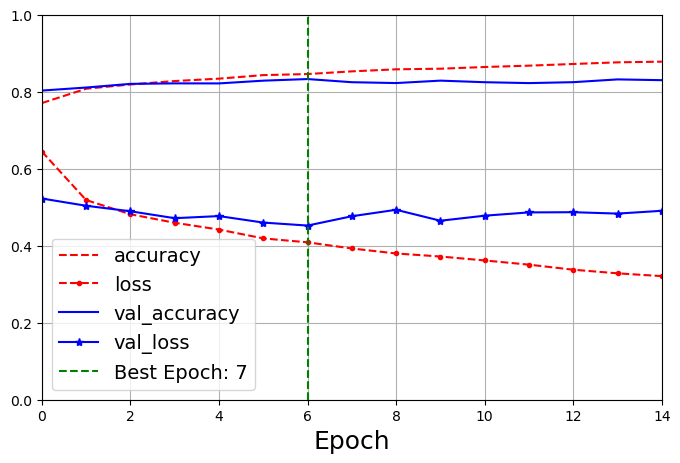

In [72]:
model3.evaluate(X_test_scaled_top, y_test)
y_pred_model3_proba = model3.predict(X_test_scaled_top)
y_pred_model3_proba.round(2)
y_pred_model3 = y_pred_model3_proba.argmax(axis=-1)
y_pred_model3
cl_report_model3 = classification_report(y_test,y_pred_model3)
print(cl_report_model3)
model_3_df = pd.DataFrame(model_3.history)

pd.DataFrame(model_3.history).plot(
 figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

best_epoch = model_3_df['val_loss'].idxmin() + 1
plt.axvline(x=(best_epoch-1), color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')
plt.legend()
plt.show()


At this model with batch normalization layers introduced, we observe that the validation loss is unstable until epoch 12 when starts to clearly increase. Still overifitting occurs though as the difference between training values and validation values increasing (validation accuracy achives the highest values at epoch seven and then platues or even decrease). Classes 4 and 6 still hard to recognized.

We rebuilt and train the base model, this time adding a dropout layer with a rate of 0.50 after each dense
layer. We won't be using early stopping or batch normalization this time. 

In [73]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[14, 28]),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dropout(rate=0.5),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dropout(rate=0.5),
 tf.keras.layers.Dense(32, activation="relu"),
 tf.keras.layers.Dropout(rate=0.5),
 tf.keras.layers.Dense(10, activation="softmax")
])
model4.summary()
model4.compile(optimizer = tf.keras.optimizers.Adam(), loss = loss_function, metrics = metrics)
initial_weights_model4 = model4.get_weights()
model4.set_weights(initial_weights_model4) #We initialize the model weights.
model_4 = model4.fit(X_train_scaled_top,y_train, epochs=epochs,batch_size=batch_size,
                      validation_data = (X_valid_scaled_top,y_valid))


c:\Users\tasos\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,970 (238.16 KB)

 Trainable params: 60,970 (238.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.4042 - loss: 1.5852 - val_accuracy: 0.7524 - val_loss: 0.6965
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6746 - loss: 0.8913 - val_accuracy: 0.7726 - val_loss: 0.6316
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7124 - loss: 0.8048 - val_accuracy: 0.7748 - val_loss: 0.6068
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7262 - loss: 0.7705 - val_accuracy: 0.7853 - val_loss: 0.5922
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7392 - loss: 0.7403 - val_accuracy: 0.7923 - val_loss: 0.5683
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7473 - loss: 0.7171 - val_accuracy: 0.7991 - val_loss: 0.5613
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7527 - loss: 0.7030 - val_accuracy: 0.8063 - val_loss: 0.5436
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7585 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.5547
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.98      0.91      0.94      1000
           2       0.64      0.67      0.65      1000
           3       0.77      0.86      0.81      1000
           4       0.62      0.67      0.64      1000
           5       0.96      0.92      0.94      1000
           6       0.52      0.42      0.46      1000
           7       0.88      0.93      0.90      1000
           8       0.93      0.96      0.94      1000
           9       0.92      0.91      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



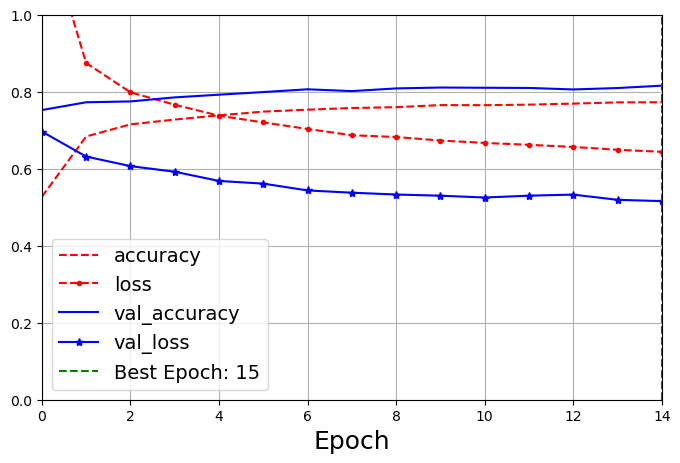

In [74]:
model4.evaluate(X_test_scaled_top, y_test)
y_pred_model4_proba = model4.predict(X_test_scaled_top)
y_pred_model4_proba.round(2)
y_pred_model4 = y_pred_model4_proba.argmax(axis=-1)
y_pred_model4
cl_report_model4 = classification_report(y_test,y_pred_model4)
print(cl_report_model4)
model_4_df = pd.DataFrame(model_4.history)
pd.DataFrame(model_4.history).plot(
 figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])

best_epoch = model_4_df['val_loss'].idxmin() + 1
plt.axvline(x=(best_epoch-1), color='g', linestyle='--', label=f'Best Epoch: {best_epoch}')
plt.legend()
plt.show()


Model 4 with dropout layers helped mitigate overfitting issues. Since dropout is only active during training, comparing the training loss and the validation loss can be misleading. The validation loss is still decreasing after all epochs showing that there is room for more performance there.
The most noticable difference in performance comes from the 4rth model with the dropoutlayers. This came with a cost of setting the best validation loss value at epoch 15, meaning that needs more time to achieve it's best results. Also it's the model that mitigate the overfitting issue efficiently.